Boston housing price regression dataset used in this example is taken from the StatLib library which is maintained at Carnegie Mellon University.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

In [1]:
%%html
<style>
table {float:left}
</style>

Variables in order (Source: http://lib.stat.cmu.edu/datasets/boston):


| Variables | Description                                                           |
|-----------|-----------------------------------------------------------------------|
| CRIM      | per capita crime rate by town                                         |
| ZN        | proportion of residential land zoned for lots over 25,000 sq.ft.      |
| INDUS     | proportion of non-retail business acres per town                      |
| CHAS      | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX       | nitric oxides concentration (parts per 10 million)                    |
| RM        | average number of rooms per dwelling                                  |
| AGE       | proportion of owner-occupied units built prior to 1940                |
| DIS       | weighted distances to five Boston employment centres                  |
| RAD       | index of accessibility to radial highways                             |
| TAX       | full-value property-tax rate per \$10,000                             |
| PTRATIO   | pupil-teacher ratio by town                                           |
| B         | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        |
| LSTAT     | % lower status of the population                                      |
| MEDV      | Median value of owner-occupied homes in \$1000's                      |


In [2]:
from keras.datasets import boston_housing
from keras import models
from keras import layers

import pandas as pd # data structures
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

Using TensorFlow backend.


In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_data.ndim

2

In [7]:
train_data.dtype

dtype('float64')

In [8]:
data_labels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=data_labels)
df['MEDV'] = train_targets
df.describe().round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0
mean,3.7,11.5,11.1,0.1,0.6,6.3,69.0,3.7,9.4,405.9,18.5,354.8,12.7,22.4
std,9.2,23.8,6.8,0.2,0.1,0.7,27.9,2.0,8.7,166.4,2.2,94.1,7.3,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,188.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.1,0.0,0.5,5.9,45.5,2.1,4.0,279.0,17.2,374.7,6.9,16.7
50%,0.3,0.0,9.7,0.0,0.5,6.2,78.5,3.1,5.0,330.0,19.1,391.2,11.4,20.8
75%,3.7,12.5,18.1,0.0,0.6,6.6,94.1,5.1,24.0,666.0,20.2,396.2,17.1,24.8
max,89.0,100.0,27.7,1.0,0.9,8.7,100.0,10.7,24.0,711.0,22.0,396.9,38.0,50.0


How variables are affecting the price of the houses

/home/alberto/anaconda3/envs/datascience36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

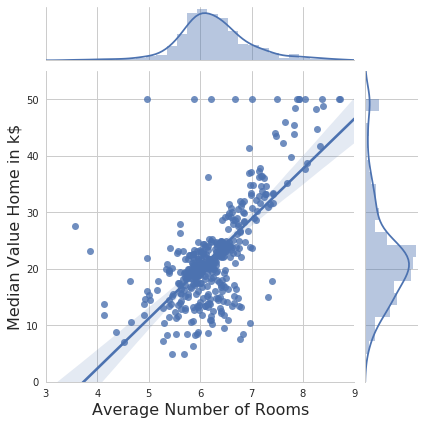

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
sns.jointplot("RM", "MEDV", data=df, kind="reg", stat_func=None, xlim=(3, 9), ylim=(0, 55))
plt.ylabel("Median Value Home in k$", fontsize=16)
plt.xlabel("Average Number of Rooms", fontsize=16)
plt.show()

<Figure size 720x720 with 0 Axes>

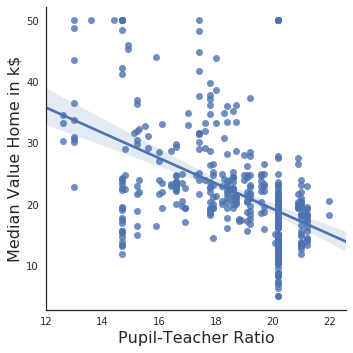

In [10]:
sns.set(style="white")
plt.figure(figsize=(10,10))
sns.lmplot(x="PTRATIO", y="MEDV", data=df)
plt.ylabel("Median Value Home in k$", fontsize=16)
plt.xlabel("Pupil-Teacher Ratio", fontsize=16)
plt.show()

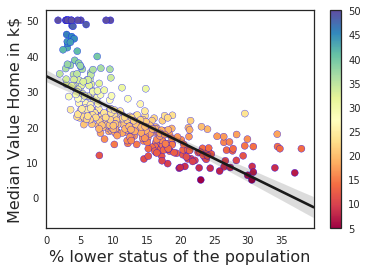

In [11]:
points = plt.scatter(df["LSTAT"], df["MEDV"],
                     c=df["MEDV"], cmap="Spectral", edgecolors='b') #set style options

plt.colorbar(points) #add a color bar
sns.regplot("LSTAT", "MEDV", data=df, scatter=False, color=".1")
plt.ylabel("Median Value Home in k$", fontsize=16)
plt.xlabel("% lower status of the population", fontsize=16)
plt.show()